In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
qr1 = QuantumRegister(size=2,name='numbers')
qr2 = QuantumRegister(size=1,name='answer-bit')
qr3 = QuantumRegister(size=1,name='carry-bit')

cr1 = ClassicalRegister(size=1,name='answer-cbit')
cr2 = ClassicalRegister(size=1,name='carry-cbit')

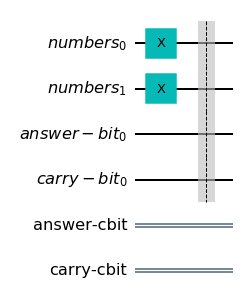

In [3]:
circuit = QuantumCircuit(qr1,qr2,qr3,cr1,cr2)
circuit.x(qr1)
circuit.barrier()
circuit.draw(output='mpl')

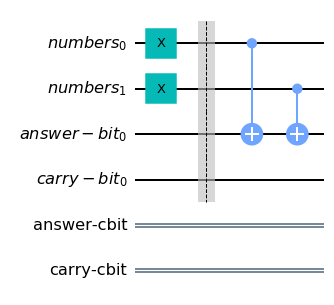

In [4]:
circuit.cx(control_qubit=qr1[0],target_qubit=qr2)
circuit.cx(control_qubit=qr1[1],target_qubit=qr2)
circuit.draw(output='mpl')

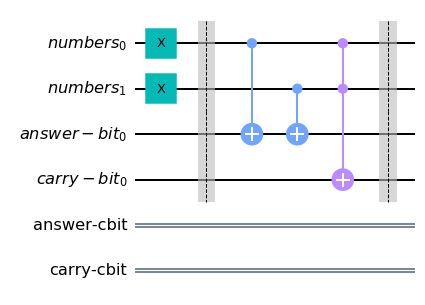

In [5]:
circuit.ccx(control_qubit1=qr1[0],control_qubit2=qr1[1],target_qubit=qr3)
circuit.barrier()
circuit.draw(output='mpl')

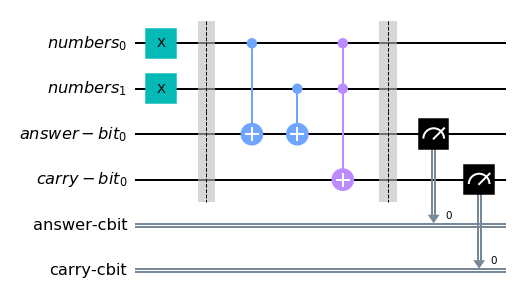

In [6]:
circuit.measure(qr2,cr1)
circuit.measure(qr3,cr2)
circuit.draw(output='mpl')

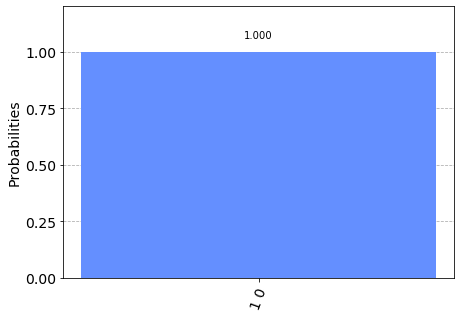

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator).result()
plot_histogram(result.get_counts())